In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import clear_output
import IPython.display as ipd
import librosa
import time as time
import os

import ruptures as rpt

from chord_prediction import CNN, predict

In [2]:
# Global
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sr = 44100  
device_index = 1  
# print(sd.query_devices())

root_mapping =  { "NC": 0, "A": 1, "A#": 2, "B": 3, "C": 4, "C#": 5, "D": 6, "D#": 7, "E": 8, "F": 9, "F#": 10, "G": 11, "G#": 12 }
chord_mapping = { "NC": 0, "": 1, "m": 2, "5": 3, "7": 4, "maj7": 5, "m7": 6, "6": 7, "m6": 8, "9": 9, "m9": 10, "dim": 11, "aug": 12, "sus2": 13, "sus4": 14, "m7b5": 15 }

# Root
root_model = CNN(num_classes=len(root_mapping))
root_model.load_state_dict(torch.load('rootcqtcnn_asim1_1005.pth', map_location=device))
root_model.eval()

# Chord
chord_model = CNN(num_classes=len(chord_mapping))
chord_model.load_state_dict(torch.load('chordcqtcnn_asim1_0905.pth', map_location=device))
chord_model.eval()
clear_output(wait=True)


Recording finished.


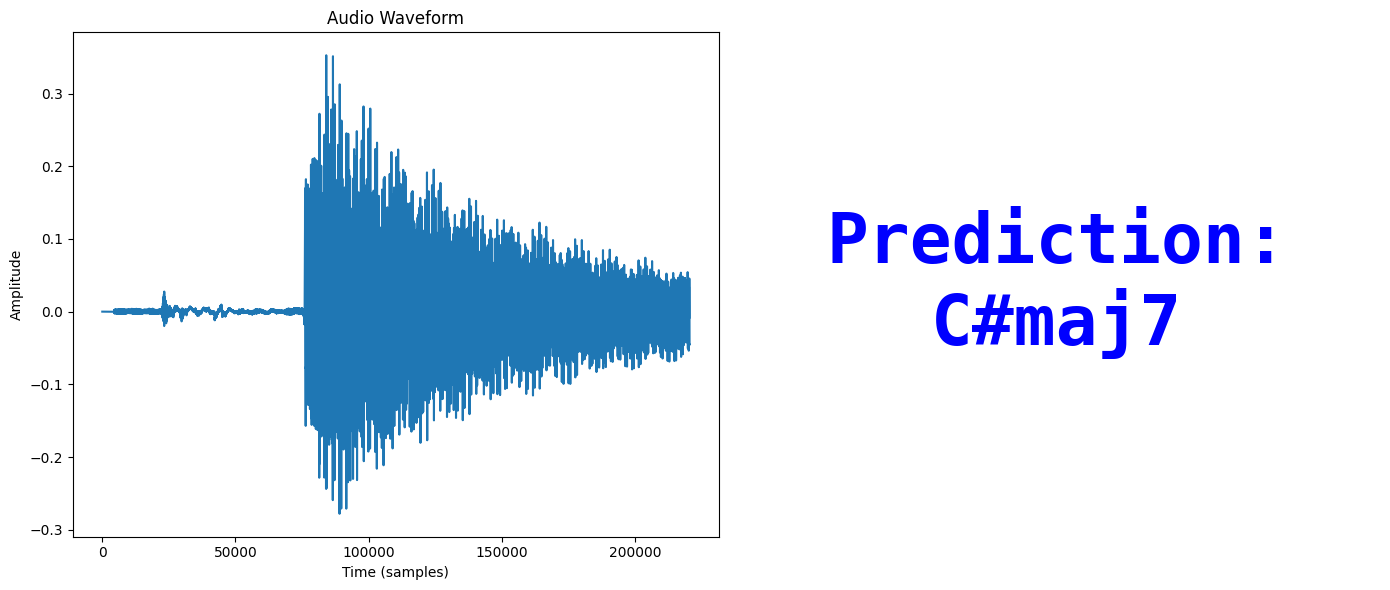

In [4]:
# Record audio 
print("Recording...")

audio_data = sd.rec(int(sr * 5),
                    samplerate=sr,
                    channels=1,
                    dtype='float32',
                    device=device_index)

sd.wait()  # Wait for the recording to finish

clear_output(wait=True)
print("Recording finished.")

audio_data = audio_data.flatten()
result, root, chord = predict(audio_data, root_model, chord_model)

# Rseult Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(audio_data)
ax1.set_title('Audio Waveform')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Amplitude')

ax2.text(0.5, 0.5, f'Prediction:\n{result}',
         fontsize=50, ha='center', va='center',
         color='blue', fontweight='bold', family='monospace')
ax2.axis('off') 

plt.tight_layout()
plt.show()